# Parabolic Exercises

As an example for a parabolic partial differential equations consider the convection-diffusion-reaction equation.
\begin{align*}
    \partial_t c = \text{div} (\kappa_c \nabla c - cq) + r(c)
\end{align*}
For instance think about a bacterial colony with initial concentration $$ c(0,x) = c_0(x) $$ and a linearized reaction term $$ r(c) = Rc $$
First, we consider a reaction rate of $R=5$, leading to exponential growth.

In [1]:
import sys
sys.path.append('../..')

from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import python.mppy as mppy
from plotting import *
import pandas as pd

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/ardar/mpp/build
-- PROJECT_SOURCE_DIR= /home/ardar/mpp
-- PROJECT_MPP_DIR=    /home/ardar/mpp
-- Option:     BUILD_UQ= OFF   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-- Option:     CONST_VERY_LARGE= 1e30   (using cached value)
-- Option:     CONST_INFTY= 1e100   (using cached value)
-- Option:     SPACE_DIM= 3   (using cached value)
-- Option:     USE_SPACETIME= OFF   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= OFF   (using cached value)
-- Op

0

In [2]:
mpp.run(4, config="TUT_reaction")


================ running  mpp ================

start program on 4 procs at Sat Aug 10 14:13:51 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 0.01
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearEpsilon: ........................... 1e-15
     LinearReduction: ..........

0

In [3]:
import os
sorted(os.listdir(mpp.dm.PROJECT_VTU_DATA_DIR))

['C.0',
 'C.0.pvtu',
 'C.1',
 'C.1.pvtu',
 'C.10',
 'C.10.pvtu',
 'C.11',
 'C.11.pvtu',
 'C.12',
 'C.12.pvtu',
 'C.13',
 'C.13.pvtu',
 'C.14',
 'C.14.pvtu',
 'C.15',
 'C.15.pvtu',
 'C.16',
 'C.16.pvtu',
 'C.17',
 'C.17.pvtu',
 'C.18',
 'C.18.pvtu',
 'C.19',
 'C.19.pvtu',
 'C.2',
 'C.2.pvtu',
 'C.20',
 'C.20.pvtu',
 'C.21',
 'C.21.pvtu',
 'C.22',
 'C.22.pvtu',
 'C.23',
 'C.23.pvtu',
 'C.24',
 'C.24.pvtu',
 'C.25',
 'C.25.pvtu',
 'C.26',
 'C.26.pvtu',
 'C.27',
 'C.27.pvtu',
 'C.28',
 'C.28.pvtu',
 'C.29',
 'C.29.pvtu',
 'C.3',
 'C.3.pvtu',
 'C.30',
 'C.30.pvtu',
 'C.31',
 'C.31.pvtu',
 'C.32',
 'C.32.pvtu',
 'C.33',
 'C.33.pvtu',
 'C.34',
 'C.34.pvtu',
 'C.35',
 'C.35.pvtu',
 'C.36',
 'C.36.pvtu',
 'C.37',
 'C.37.pvtu',
 'C.38',
 'C.38.pvtu',
 'C.39',
 'C.39.pvtu',
 'C.4',
 'C.4.pvtu',
 'C.40',
 'C.40.pvtu',
 'C.41',
 'C.41.pvtu',
 'C.42',
 'C.42.pvtu',
 'C.43',
 'C.43.pvtu',
 'C.44',
 'C.44.pvtu',
 'C.45',
 'C.45.pvtu',
 'C.46',
 'C.46.pvtu',
 'C.47',
 'C.47.pvtu',
 'C.48',
 'C.48.pvtu'

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0,vmax=1.0)

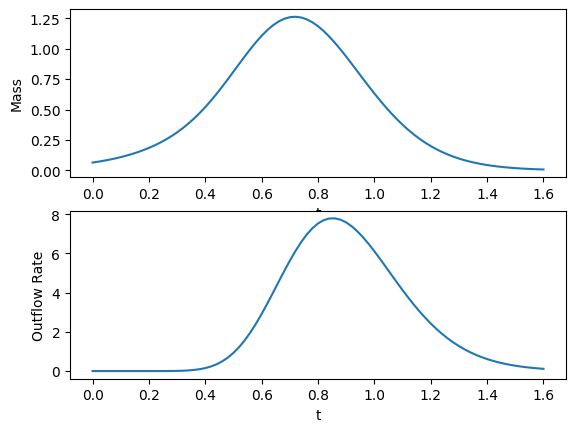

In [5]:
mpp.reset_data()
mpp.parse_json()

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

fig, axs = plt.subplots(2, 1)

axs[0].plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
axs[0].set_xlabel('t')
axs[0].set_ylabel('Mass')

axs[1].plot([d['t'] for d in dict_array], [d['OFR'] for d in dict_array])
axs[1].set_xlabel('t')
axs[1].set_ylabel('Outflow Rate')

plt.show()

### 1. Different reaction rates

Of course we can also use negative rates which result in exponential decay:

In [6]:
kwargs = {"Reaction": -2.5}
mpp.run(4, config="TUT_reaction", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Sat Aug 10 14:27:58 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 0.01
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearEpsilon: ........................... 1e-15
     LinearReduction: ..........

0

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0,vmax=1.0)

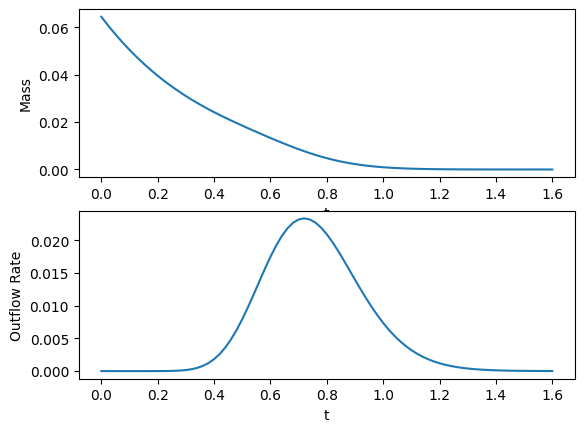

In [8]:
mpp.reset_data()
mpp.parse_json()

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

fig, axs = plt.subplots(2, 1)

axs[0].plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
axs[0].set_xlabel('t')
axs[0].set_ylabel('Mass')

axs[1].plot([d['t'] for d in dict_array], [d['OFR'] for d in dict_array])
axs[1].set_xlabel('t')
axs[1].set_ylabel('Outflow Rate')

plt.show()

In [ ]:
kwargs = {"Reaction": 2.5}
mpp.run(4, config="TUT_reaction", kwargs=kwargs)

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0,vmax=1.0)

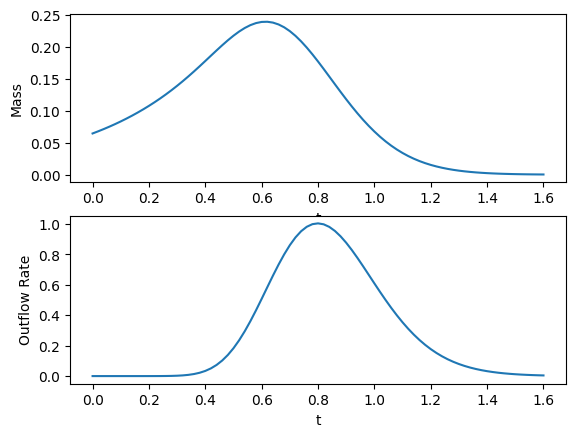

In [10]:
mpp.reset_data()
mpp.parse_json()

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

fig, axs = plt.subplots(2, 1)

axs[0].plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
axs[0].set_xlabel('t')
axs[0].set_ylabel('Mass')

axs[1].plot([d['t'] for d in dict_array], [d['OFR'] for d in dict_array])
axs[1].set_xlabel('t')
axs[1].set_ylabel('Outflow Rate')

plt.show()

### 2. Oszillations in convection dominant cases

For $\kappa_c \to 0$ and $R>1$ we can observe oscillations in the solution with Lagrange elements. Those effects are exacerbated by the positive reaction rate.

In [9]:
mpp.run(4, config="TUT_reaction", kwargs={"Diffusion": 0.00001})


================ running  mpp ================

start program on 4 procs at Sat Aug 10 14:31:58 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 1e-05
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearEpsilon: ........................... 1e-15
     LinearReduction: .........

0

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0.0,vmax=1.0)

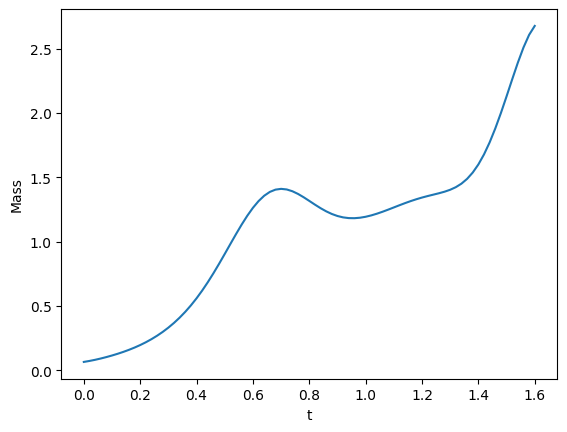

In [11]:
mpp.reset_data()
mpp.parse_json()

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.show()

### 3. Higher order Ansatzelements 

One intuitive solution would be to just crank up the polynomial degree of the finite element functions. Unfortunately it does not solve the problem.

In [12]:
mpp.run(4, config="TUT_reaction", kwargs={"degree": 2,
                                        "Diffusion": 0.00001})


================ running  mpp ================

start program on 4 procs at Sat Aug 10 14:37:08 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 2
     delta: ................................... 0.0
     Diffusion: ............................... 1e-05
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearEpsilon: ........................... 1e-15
     LinearReduction: .........

0

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0.0,vmax=1.0)

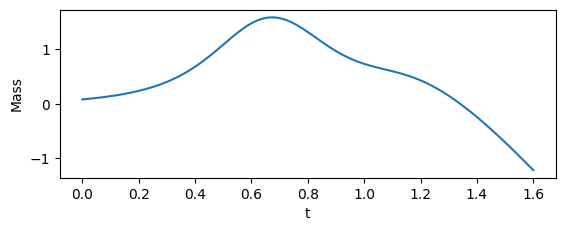

In [14]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.show()

### 4. Petrov-Galerkin method (PG)

One way to resolve the problem is to introduce artificial diffusion to smoothe the oscillations. This is achieved by modifying the test functions $$\phi_h|_K = \phi_h + \delta_K \mathbf{q} \cdot \nabla \phi_h$$ with parameter $\delta_K$ which we can adjust with the variable $\texttt{delta}$ in the config file.

In [17]:
mpp.run(4, config="TUT_reaction", kwargs={"delta": 0.05,
                                        "Diffusion": 0.00001})


================ running  mpp ================

start program on 4 procs at Sat Aug 10 14:56:23 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.05
     Diffusion: ............................... 1e-05
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearEpsilon: ........................... 1e-15
     LinearReduction: ........

0

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0.0,vmax=1.0)

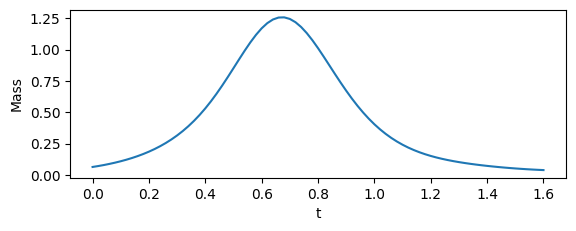

In [19]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.show()

### 5. Discontinuous-Galerkin method (DG)

Another approach is to drop the continuity of the ansatzfunctions which leads us to so-called Discontinous-Galerkin elements. Here we will use $\texttt{degree=1}$ which corresponds to affine functions on every element.

In [26]:
mpp.run(4, config="TUT_reaction", kwargs={"Model": "DGReaction",
                                        "degree": 1,
                                        "Diffusion": 0.00001})


================ running  mpp ================

start program on 4 procs at Sat Aug 10 15:21:53 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... 1
     ConfigVerbose: ........................... 1
     Convection: .............................. 1.0
     degree: .................................. 1
     delta: ................................... 0.0
     Diffusion: ............................... 1e-05
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     dt_min: .................................. 0.0001
     ElementPool: ............................. false
     flux_alpha: .............................. 1
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 1
     LinearEpsilon: ........................... 1e-15
     LinearReduction: .........

0

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0.0,vmax=1.0)

Until now the plots always showed 'Point Data' but it could also be of interest to look at 'Cell Data'. This is possible with the additional argument plot_cell_data=True.

In [ ]:
@interact
def plot_nth_frame(n= widgets.IntSlider(min=0, max=80, step=1, value=0)):
    p = mpp.vtu_plot()
    p.add_vtu("C.{}.pvtu".format(n),vmin = 0.0,vmax=1.0,plot_cell_data=True)

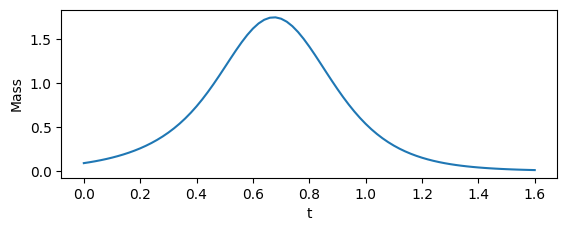

In [28]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['ParabolicPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.show()